## Vector data classification and joining in Geopandas

<p>This task aims to explore the dominance area for one of the shopping centers in Helsinki with different travel modes (Public transport, private car).
The dominance area is the geographical area from where the given service (shopping center) is the closest one to reach in terms of travel time.
    
The datasets include a text file containing data about accessibility in Helsinki Region and a Shapefile that contains a Polygon grid that can be used to visualize and analyze the data spatially. The datasets are:

<ul>
    <li>TravelTimes_to_5944003_Itis.txt - Includes travel times and road network distances to The Itis shopping center</li>
    <li>MetropAccess_YKR_grid_EurefFIN.shp - Includes a Polygon grid with 'YKR_ID' column that can be used to join the grid with the accessibility data</li>
</ul>
</p>

In [1]:
# Import necessary modules/libraries
import pandas as pd
import geopandas as gpd
import pysal.viz.mapclassify as mc
import matplotlib.pyplot as plt

In [2]:
# Load travel time data file for Itis shopping centre
itis_travel = pd.read_csv('TravelTimes_to_5944003_Itis.txt', sep=";")
itis_travel.head(2)

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5944003,494,34582,50,36229,44,36229,132,157,38465,142,173,38465
1,5785641,5944003,457,31966,51,36439,45,36439,135,154,38671,145,171,38671


In [3]:
# Select only the pt_r_tt (Public transport travel mode), car_r_t (Car transport travel mode), from_id & to_id columns
itis_sel = itis_travel[['pt_r_tt', 'car_r_t', 'from_id', 'to_id']]
itis_sel.head(2)

,pt_r_tt,car_r_t,from_id,to_id
0,157,50,5785640,5944003
1,154,51,5785641,5944003


In [4]:
# load the MetropAccess shapefile
path = 'MetropAccess_YKR_grid_EurefFIN.shp'
metropaccess = gpd.read_file(path)
metropaccess.head(2)

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."


In [5]:
# Merge the Itis_travel dataframe with the Metro grid geodataframe
metrop_itis = metropaccess.merge(itis_sel, left_on='YKR_ID', right_on='from_id')
metrop_itis.head(2)

,x,y,YKR_ID,geometry,pt_r_tt,car_r_t,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",157,50,5785640,5944003
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",154,51,5785641,5944003


In [6]:
# Create a classifier 
n_classes = 5
classifier = mc.NaturalBreaks.make(k=n_classes)

In [7]:
# Classify travel times (Public transport)
public_classes = metrop_itis[['pt_r_tt']].apply(classifier)

In [8]:
# Classify travel times (Car transport)
car_classes = metrop_itis[['car_r_t']].apply(classifier)

In [9]:
# join the classes to the metrop_itis geodataframe
metrop_itis_nb = metrop_itis.join(public_classes, how = 'left', rsuffix = '_classes')
metrop_itis_nb.head(2)

,x,y,YKR_ID,geometry,pt_r_tt,car_r_t,from_id,to_id,pt_r_tt_classes
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",157,50,5785640,5944003,4
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",154,51,5785641,5944003,4


In [10]:
metrop_itis_nb = metrop_itis_nb.join(car_classes, how = 'left', rsuffix = '_classes')
metrop_itis_nb.head(2)

,x,y,YKR_ID,geometry,pt_r_tt,car_r_t,from_id,to_id,pt_r_tt_classes,car_r_t_classes
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",157,50,5785640,5944003,4,3
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",154,51,5785641,5944003,4,3


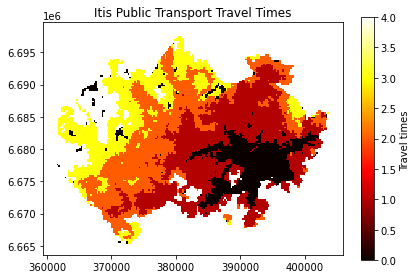

In [11]:
# Plot Itis Public Transport Travel Times
fig,ax = plt.subplots()
metrop_itis_nb.plot(column="pt_r_tt_classes", ax=ax, linewidth=0, cmap='hot' ,legend=True, legend_kwds={'label': "Travel times "})
plt.title('Itis Public Transport Travel Times')
plt.savefig('Itis_Public_T_tt.png', facecolor='w')
plt.tight_layout()

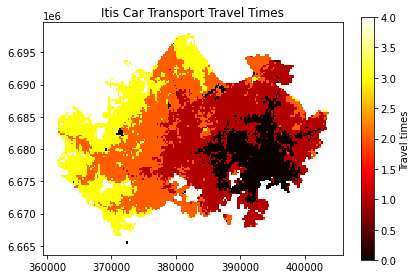

In [12]:
# Plot Itis Car Transport Travel Times
fig,ax = plt.subplots()
metrop_itis_nb.plot(column="car_r_t_classes", ax=ax, linewidth=0, cmap='hot' ,legend=True, legend_kwds={'label': "Travel times "})
plt.title('Itis Car Transport Travel Times')
plt.savefig('Itis_Car_T_tt.png', facecolor='w')
plt.tight_layout()